#HW1 - Data Exploration and Preparation

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [55]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()
   

## Loading the dataset

In [56]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

**Part 1: Basic model selection with KNN**

In [57]:
pcr49_train = train_df[['PCR_04', 'PCR_09']]

**Q1: Visualization and basic analysis**

c:\Users\nirhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


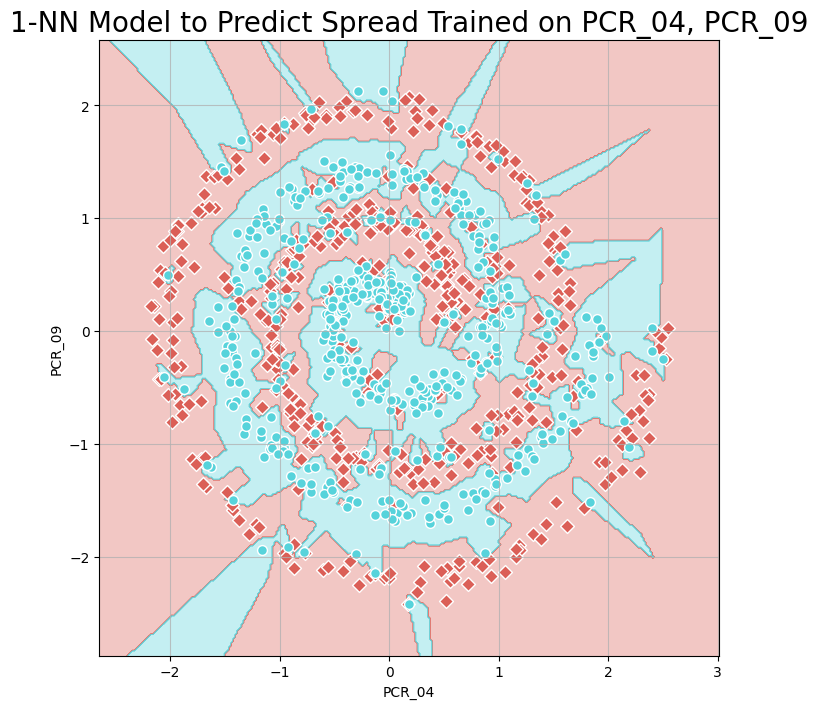

In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
y_train = train_df['spread']
knn.fit(pcr49_train, y_train)

visualize_clf(knn, pcr49_train, y_train, "1-NN Model to Predict Spread Trained on PCR_04, PCR_09", 'PCR_04', 'PCR_09')

**Model selection**


**Q2**

{1: 1.0, 3: 0.8684285714285713, 5: 0.8482857142857143, 7: 0.8467142857142858, 9: 0.845, 11: 0.8418571428571429, 13: 0.8394285714285714, 15: 0.8392857142857143, 17: 0.8362857142857143, 19: 0.8355714285714286, 20: 0.8338571428571429, 85: 0.5531428571428572, 150: 0.545, 215: 0.6015714285714285, 280: 0.5477142857142858, 345: 0.5204285714285715, 410: 0.5085714285714286, 475: 0.505, 540: 0.505, 605: 0.505, 670: 0.505}
{1: 0.733, 3: 0.793, 5: 0.807, 7: 0.8240000000000001, 9: 0.8270000000000001, 11: 0.8270000000000001, 13: 0.8290000000000001, 15: 0.8280000000000001, 17: 0.8300000000000001, 19: 0.8280000000000001, 20: 0.8220000000000001, 85: 0.542, 150: 0.546, 215: 0.5900000000000001, 280: 0.544, 345: 0.516, 410: 0.506, 475: 0.505, 540: 0.505, 605: 0.505, 670: 0.505}


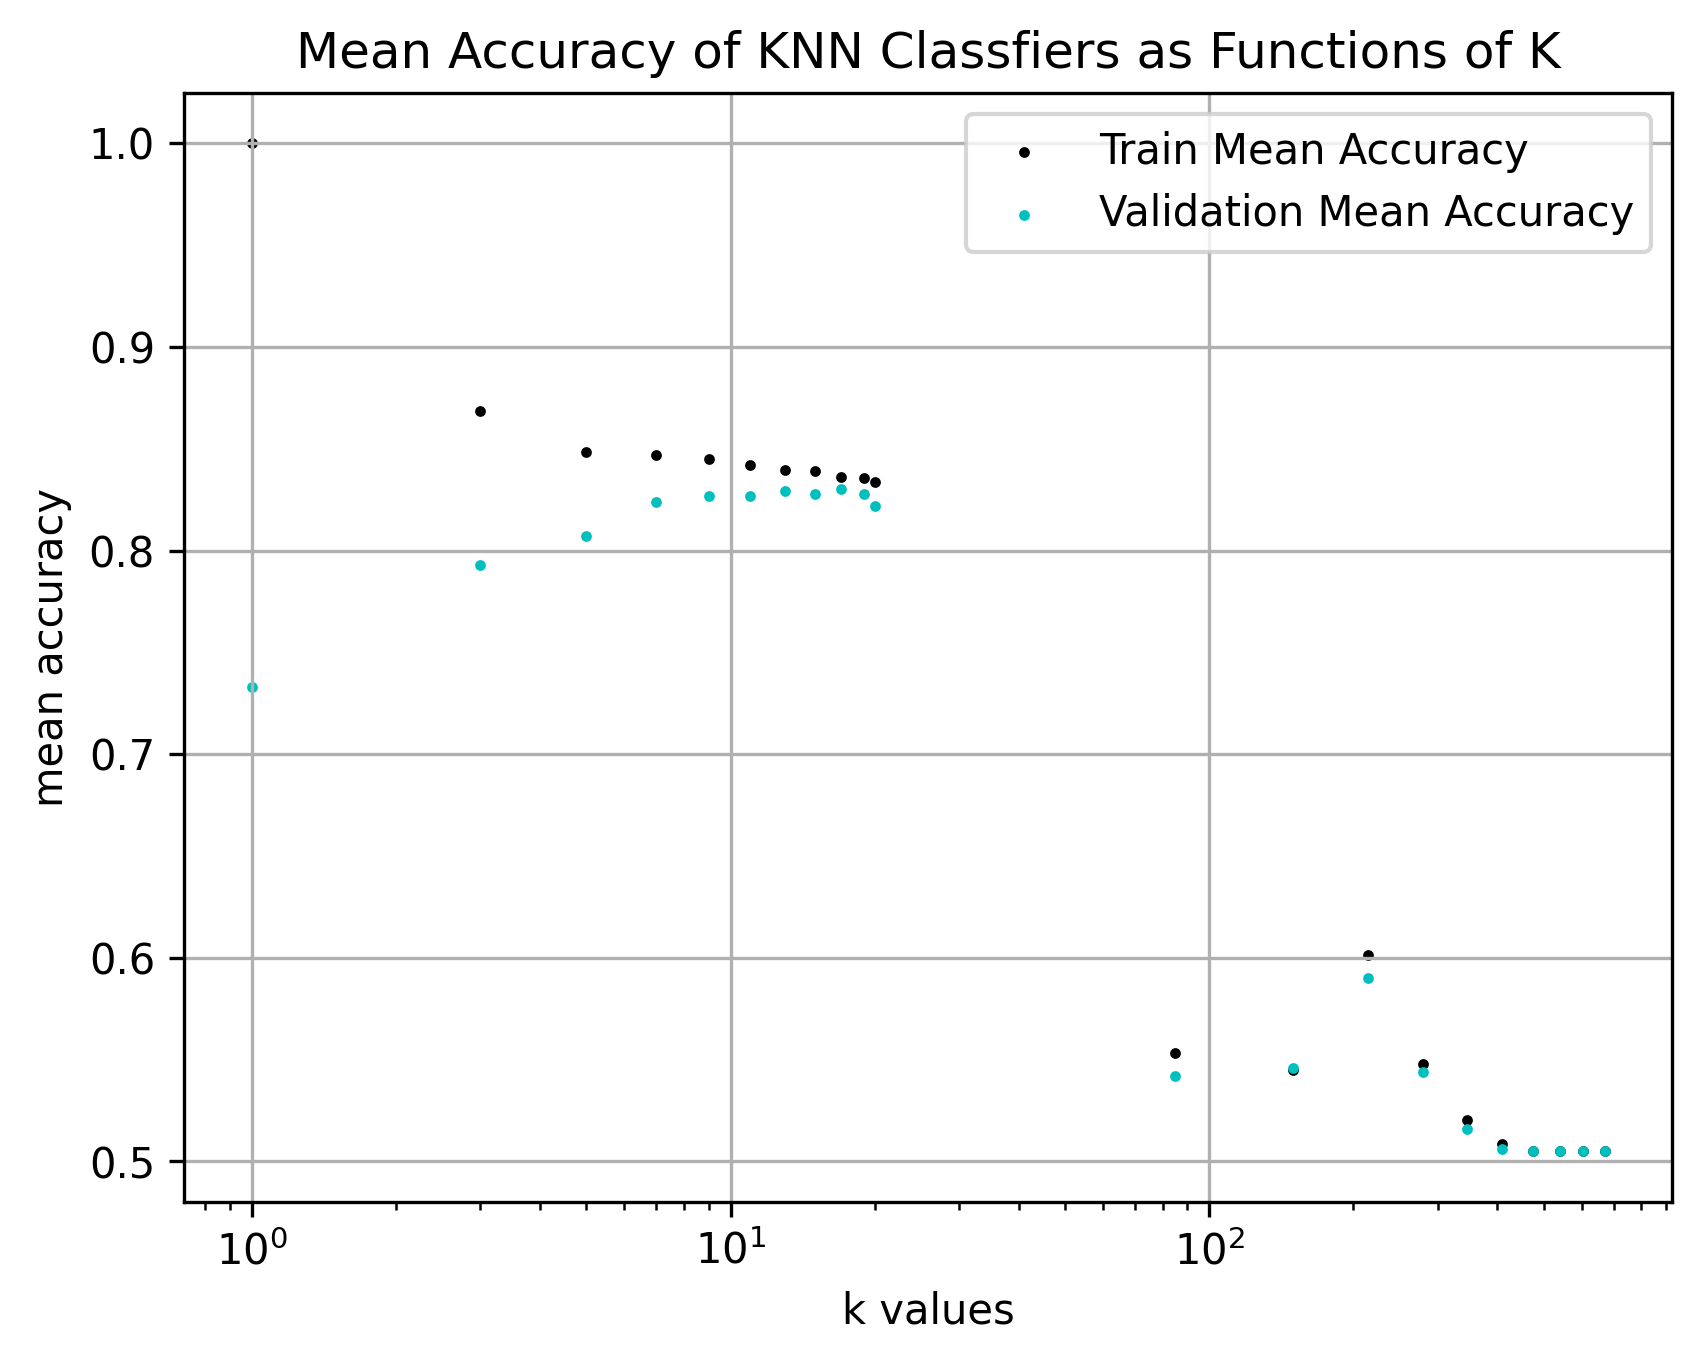

In [59]:
k_list = list(range(1, 20, 2)) + list(range(20, 695, 65))
train_accuracies = {}
test_accuracies = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_results = cross_validate(knn, pcr49_train, y_train, cv=8, scoring='accuracy', return_train_score=True)
    train_accuracies[k] = np.mean(cv_results['train_score'])
    test_accuracies[k] = np.mean(cv_results['test_score'])
plt.figure(dpi=300)
plt.grid()
plt.scatter(k_list, train_accuracies.values(), c='k', s=2.5, label="Train Mean Accuracy")
plt.scatter(k_list, test_accuracies.values(), c='c', s=2.5, label="Validation Mean Accuracy")
plt.semilogx()
plt.xlabel("k values")
plt.ylabel("mean accuracy")
plt.legend()
plt.title("Mean Accuracy of KNN Classfiers as Functions of K")
print(train_accuracies)
print(test_accuracies)

**Q3**

c:\Users\nirhe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


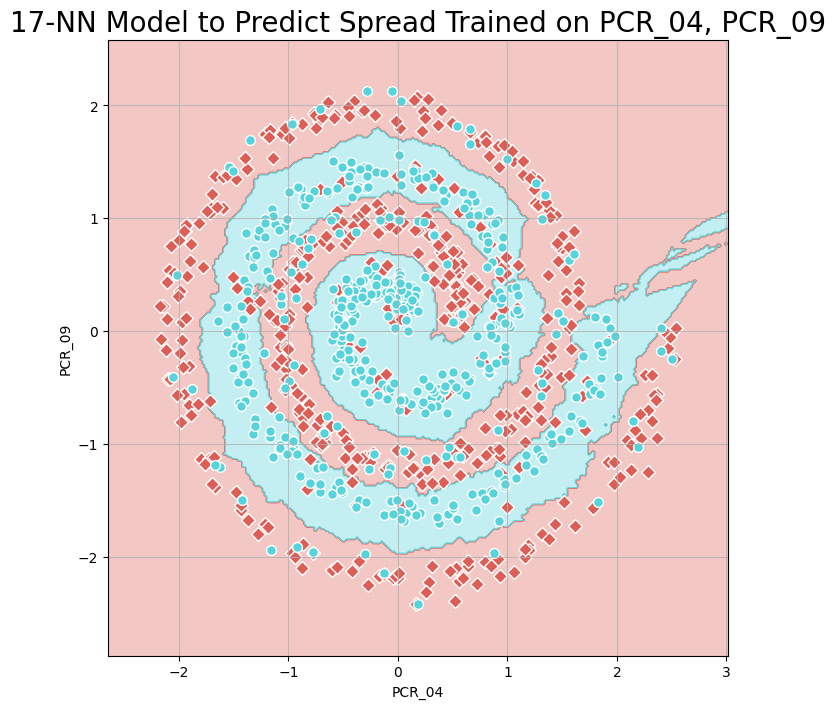

Accuracy: 84.40%


In [60]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(pcr49_train, y_train)

visualize_clf(knn, pcr49_train, y_train, "17-NN Model to Predict Spread Trained on PCR_04, PCR_09", 'PCR_04', 'PCR_09')
pcr49_test = test_df[['PCR_04', 'PCR_09']]
y_test = test_df['spread']
y_pred = knn.predict(pcr49_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

**Part 2: Decision trees**

**Q5**

0.673


[Text(0.5769230769230769, 0.875, 'PCR_03 <= 0.704\nentropy = 0.989\nsamples = 1000\nvalue = [563, 437]\nclass = -1'),
 Text(0.3076923076923077, 0.625, 'PCR_03 <= -0.762\nentropy = 1.0\nsamples = 844\nvalue = [433, 411]\nclass = -1'),
 Text(0.15384615384615385, 0.375, 'PCR_10 <= 0.471\nentropy = 0.552\nsamples = 117\nvalue = [102.0, 15.0]\nclass = -1'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.629\nsamples = 95\nvalue = [80, 15]\nclass = -1'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = -1'),
 Text(0.46153846153846156, 0.375, 'PCR_10 <= 0.741\nentropy = 0.994\nsamples = 727\nvalue = [331, 396]\nclass = +1'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.981\nsamples = 665\nvalue = [278, 387]\nclass = +1'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.598\nsamples = 62\nvalue = [53, 9]\nclass = -1'),
 Text(0.8461538461538461, 0.625, 'PCR_10 <= 0.668\nentropy = 0.65\nsamples = 156\nvalue = [130, 26]\nclass = -1'),
 Text(0.76923076923076

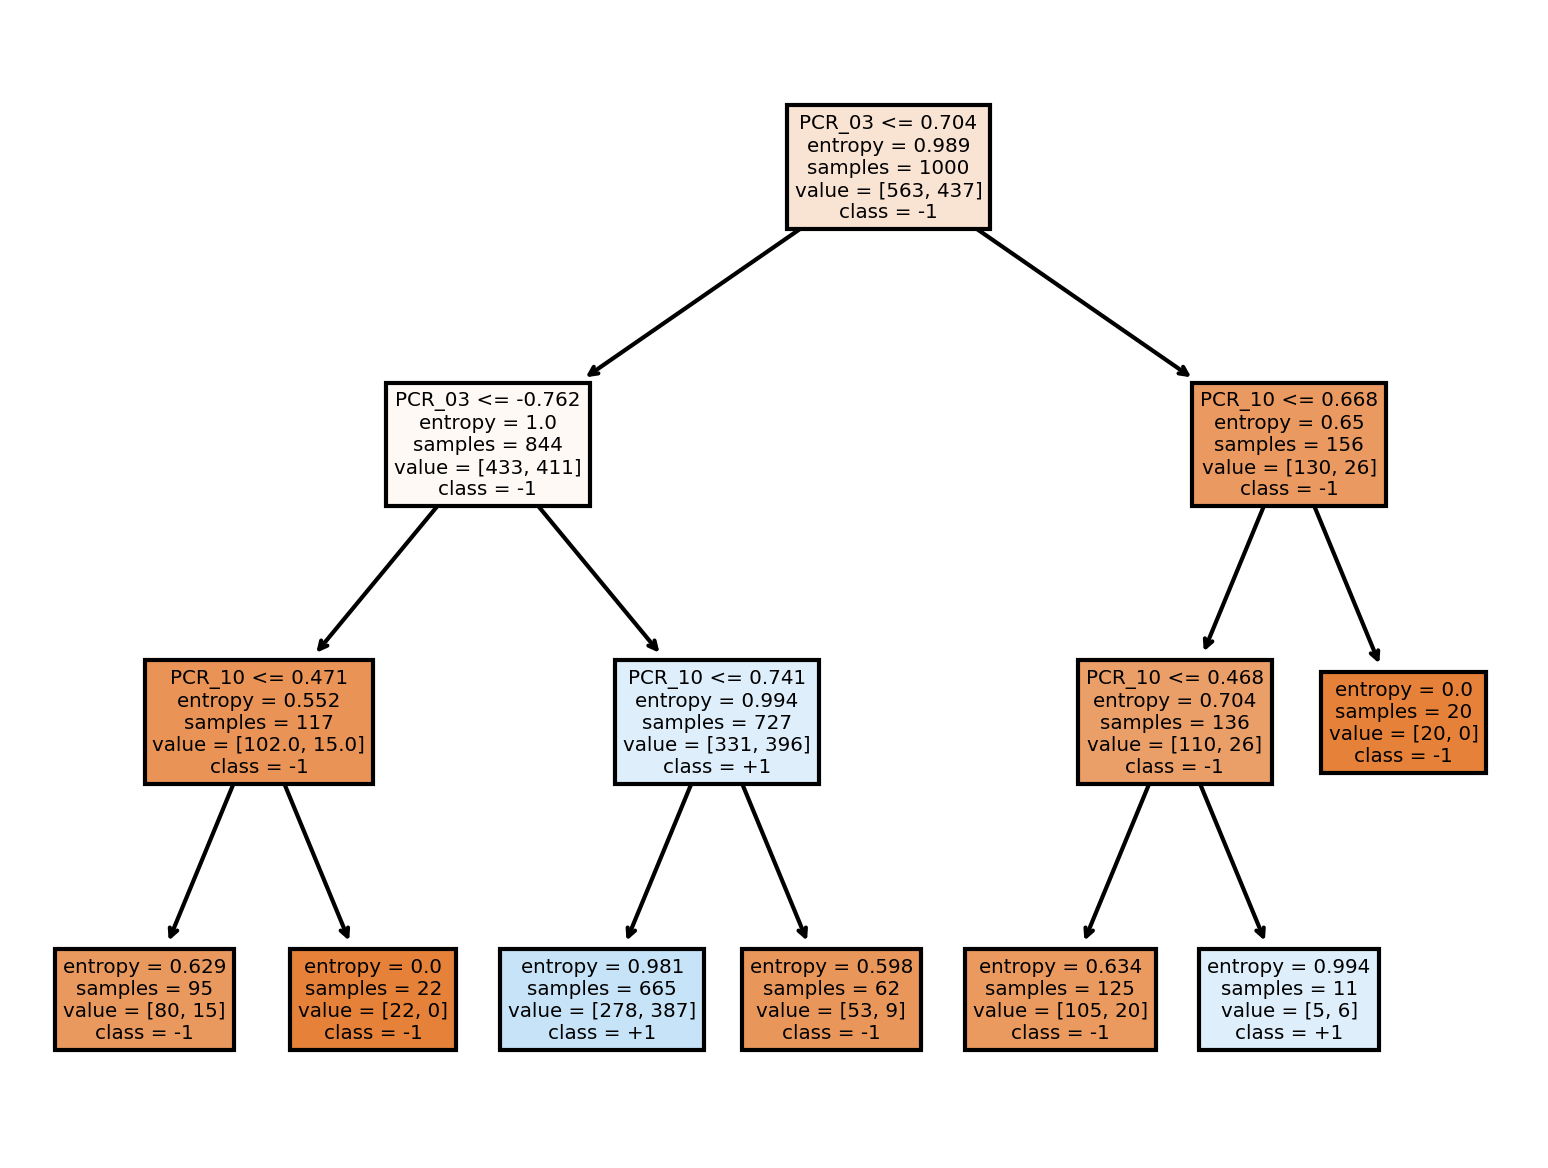

In [75]:
train_tree = train_df[['PCR_03', 'PCR_10', 'specialProperty']]
y_train_tree = train_df['risk']

tree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
tree.fit(train_tree, y_train_tree)
train_acc = tree.score(train_tree, y_train_tree)
print(train_acc)
plt.figure(dpi=300)
plot_tree(tree, filled=True, feature_names=['PCR_03', 'PCR_10','specialProperty'], class_names=['-1', '+1'])

**Q6**

Text(152.16666666666669, 0.5, 'max_depth')

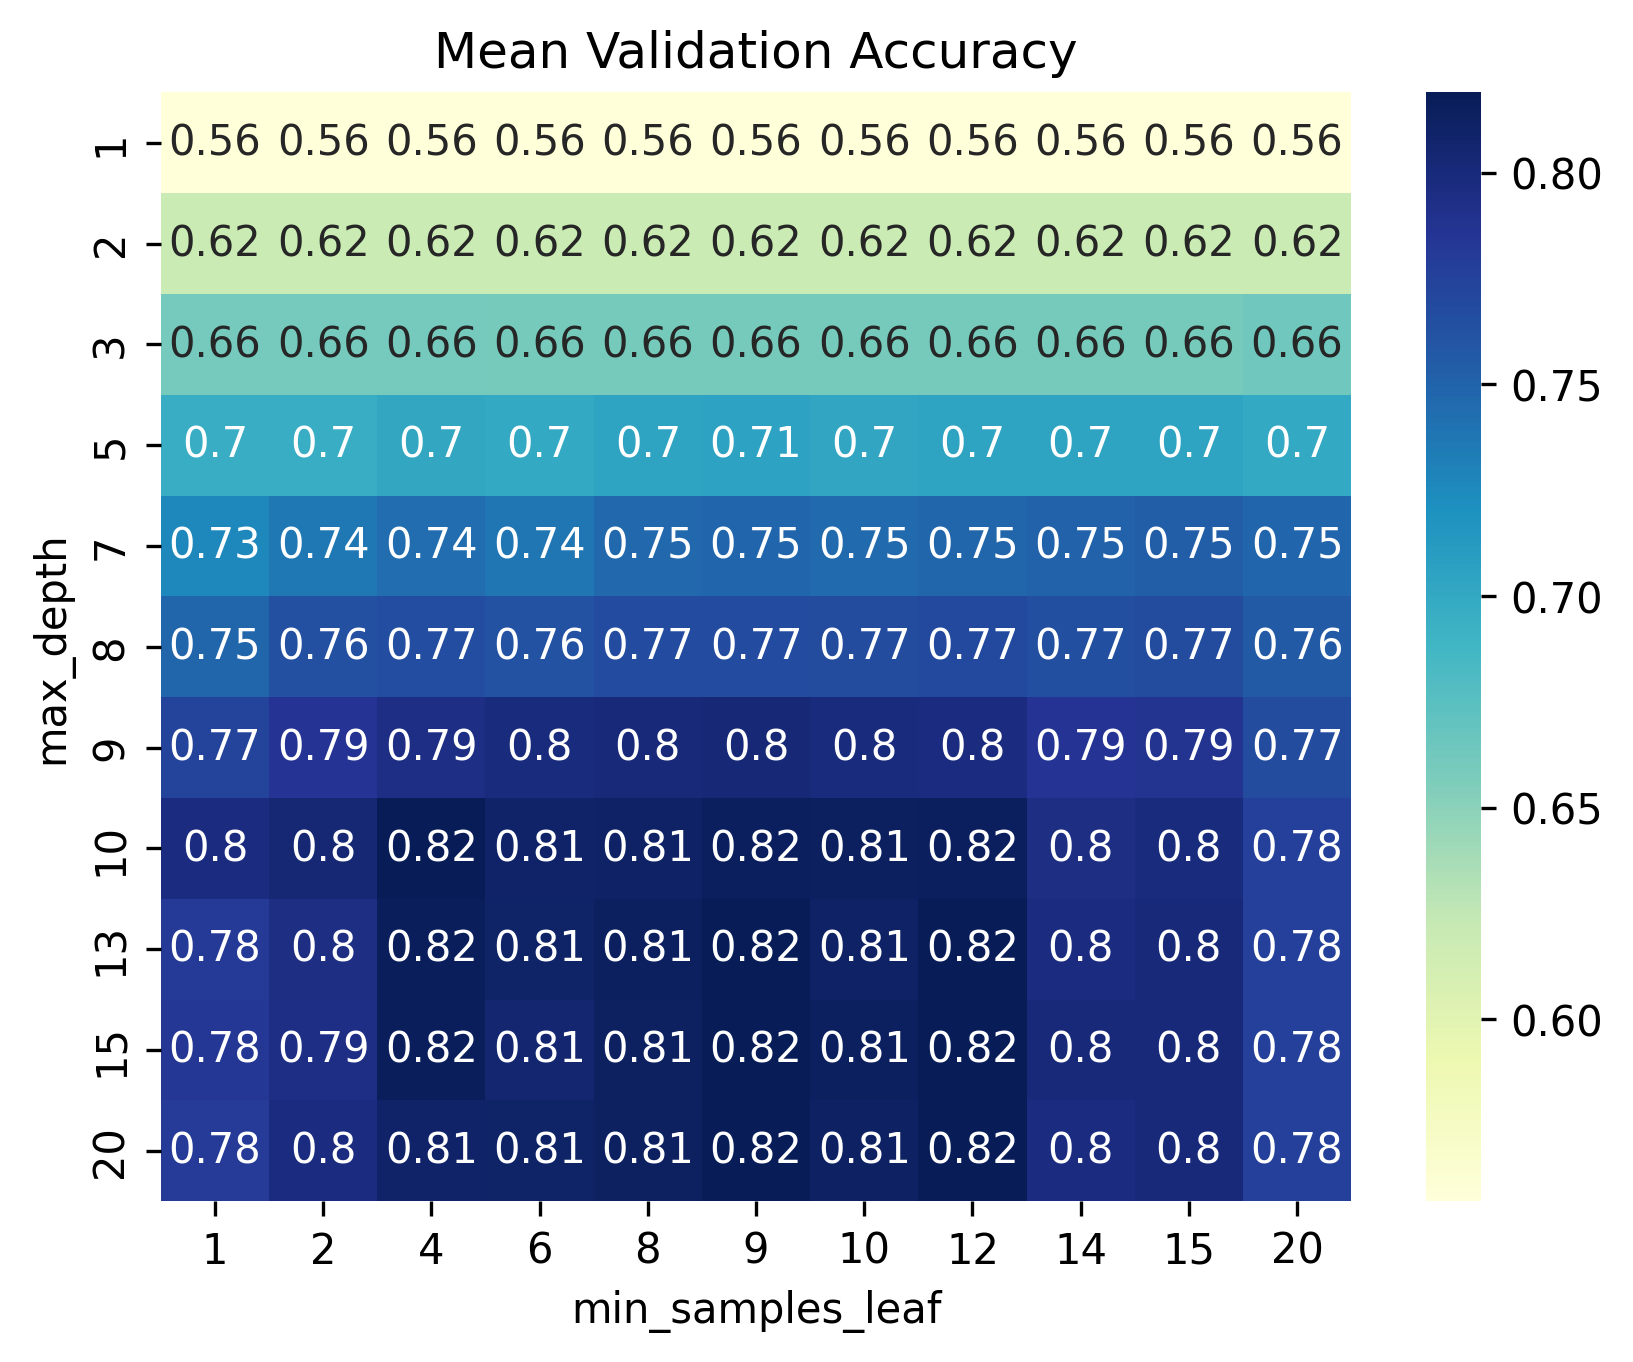

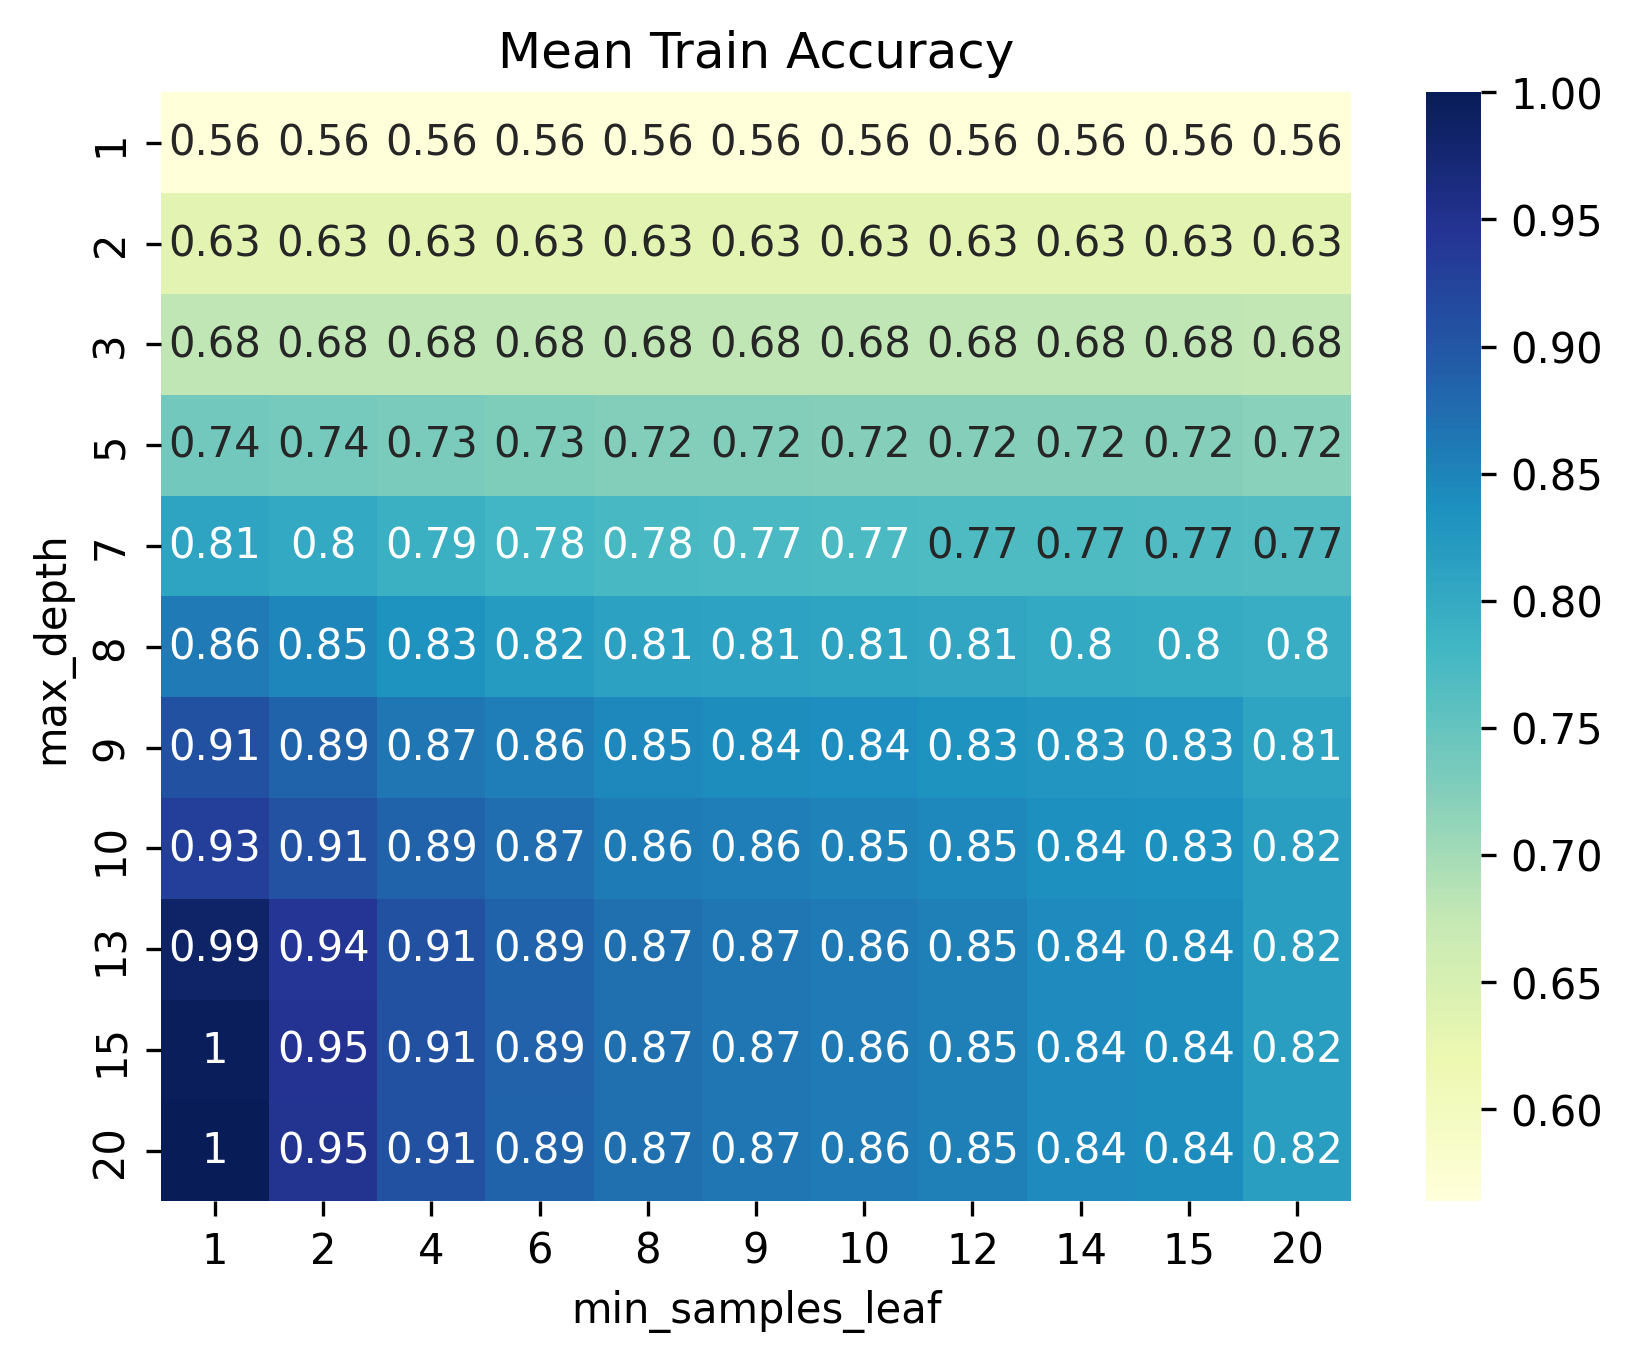

In [111]:
#max_depth = list(reversed([1, 2, 3, 5, 7, 8, 10, 13]))
#print(max_depth)
param_grid = {
    'max_depth': [1, 2, 3, 5, 7, 8,9, 10, 13,15,20],
    'min_samples_leaf': [1, 2, 4, 6, 8,9, 10, 12, 14, 15, 20]
}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree, param_grid= param_grid, cv = 5, scoring='accuracy', return_train_score=True)
grid_search.fit(train_tree, y_train_tree)
results = grid_search.cv_results_
results_df = pd.DataFrame(results)
pivot_table = results_df.pivot(index="param_max_depth", columns="param_min_samples_leaf", values='mean_test_score')
plt.figure(dpi=300)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Mean Validation Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")

pivot_table = results_df.pivot(index="param_max_depth", columns="param_min_samples_leaf", values='mean_train_score')
plt.figure(dpi=300)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Mean Train Accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("max_depth")

**Q8**

In [113]:
test_tree = test_df[['PCR_03', 'PCR_10', 'specialProperty']]
y_test_tree = test_df['risk']

tree = DecisionTreeClassifier(max_depth=10, criterion='entropy', min_samples_leaf=12)
tree.fit(train_tree, y_train_tree)
y_pred = tree.predict(test_tree)
accuracy = accuracy_score(y_test_tree, y_pred)
print(accuracy)

0.828


**Part 3: Linear SVM and the Polynomial kernel**

In [114]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class SoftSVM(BaseEstimator, ClassifierMixin):
    """
    Custom C-Support Vector Classification.
    """
    def __init__(self, C: float, lr: float = 1e-5, batch_size = 32):
        """
        Initialize an instance of this class.
        ** Do not edit this method **

        :param C: inverse strength of regularization. Must be strictly positive.
        :param lr: the SGD learning rate (step size)
        """
        self.C = C
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        self.b = 0.0

    # Initialize a random weight vector
    def init_solution(self, n_features: int):
        """
        Randomize an initial solution (weight vector)
        ** Do not edit this method **

        :param n_features:
        """
        self.w = np.random.randn(n_features)
        self.b = 0.0

    @staticmethod
    def loss(w, b: float, C: float, X, y):
        """
        Compute the SVM objective loss.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: the Soft SVM objective loss (float scalar)
        """
        margins = (X.dot(w) + b).reshape(-1, 1)
        hinge_inputs = np.multiply(margins, y.reshape(-1, 1))

        norm = np.linalg.norm(w)

        # TODO: complete the loss calculation
        loss = norm + C * np.sum(np.max(0, 1 - hinge_inputs))

        return loss

    @staticmethod
    def subgradient(w, b: float, C: float, X, y):
        """
        Compute the (analytical) SVM objective sub-gradient.

        :param w: weight vector for linear classification; array of shape (n_features,)
        :param b: bias scalar for linear classification
        :param C: inverse strength of regularization. Must be strictly positive.
        :param X: samples for loss computation; array of shape (n_samples, n_features)
        :param y: targets for loss computation; array of shape (n_samples,)
        :return: a tuple with (the gradient of the weights, the gradient of the bias)
        """
        # TODO: calculate the analytical sub-gradient of soft-SVM w.r.t w and b
        g_w = None
        g_b = 0.0

        return g_w, g_b

    def fit_with_logs(self, X, y, max_iter: int = 2000, keep_losses: bool = True):
        """
        Fit the model according to the given training data.

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        :param keep_losses:
        :return: the training losses and accuracies during training
        """
        # Initialize learned parameters
        self.init_solution(X.shape[1])

        losses = []
        accuracies = []

        if keep_losses:
            losses.append(self.loss(self.w, self.b, self.C, X, y))
            accuracies.append(self.score(X, y))

        permutation = np.random.permutation(len(y))
        X = X[permutation, :]
        y = y[permutation]
        
        # Iterate over batches
        for iter in range(0, max_iter):
            start_idx = (iter * self.batch_size) % X.shape[0]
            end_idx = min(X.shape[0], start_idx + self.batch_size)
            batch_X = X[start_idx:end_idx, :]
            batch_y = y[start_idx:end_idx]

            # TODO: Compute the (sub)gradient of the current *batch*
            g_w, g_b = None, None

            # Perform a (sub)gradient step
            # TODO: update the learned parameters correctly
            self.w = None
            self.b = 0.0

            if keep_losses:
                losses.append(self.loss(self.w, self.b, self.C, X, y))
                accuracies.append(self.score(X, y))

        return losses, accuracies

    def fit(self, X, y, max_iter: int = 2000):
        """
        Fit the model according to the given training data.
        ** Do not edit this method **

        :param X: training samples; array of shape (n_samples, n_features)
        :param y: training targets (+1 and -1); array of shape (n_samples,)
        :param max_iter: number of SGD iterations
        """
        self.fit_with_logs(X, y, max_iter=max_iter, keep_losses=False)

        return self

    def predict(self, X):
        """
        Perform classification on samples in X.

        :param X: samples for prediction; array of shape (n_samples, n_features)
        :return: Predicted class labels for samples in X; array of shape (n_samples,)
                 NOTE: the labels must be either +1 or -1
        """
        # TODO: compute the predicted labels (+1 or -1)
        y_pred = None

        return y_pred
